# MLR(MULTIPLE LINEAR REGRESSION)

# Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.


Dataset Description:

# Step 1: Exploratory Data Analysis and Data Preprocessing

In [6]:
#import the necessary libraries and load the dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [10]:
# Load the dataset

In [12]:
df= pd.read_csv('ToyotaCorolla - MLR.csv')

In [16]:
#to display first 5 rows
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


# EDA PART

In [21]:
#Missing values
print("MISSING VALUES")
print(df.isnull().sum())

MISSING VALUES
Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [25]:
# Summary statistics
print("SUMMARY STATISTICS")
print(df.describe())

SUMMARY STATISTICS
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min    

DISTRIBUTION OF VARIABLES


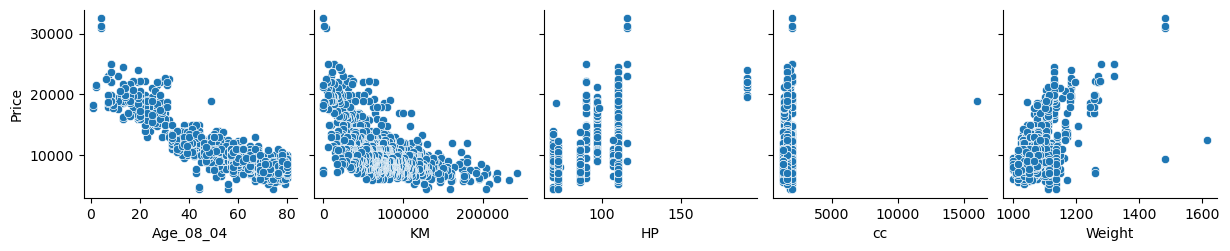

In [35]:
# Visualize the distribution of variables
print("DISTRIBUTION OF VARIABLES")
sns.pairplot(df, x_vars=['Age_08_04', 'KM', 'HP', 'cc', 'Weight'], y_vars='Price')
plt.show()

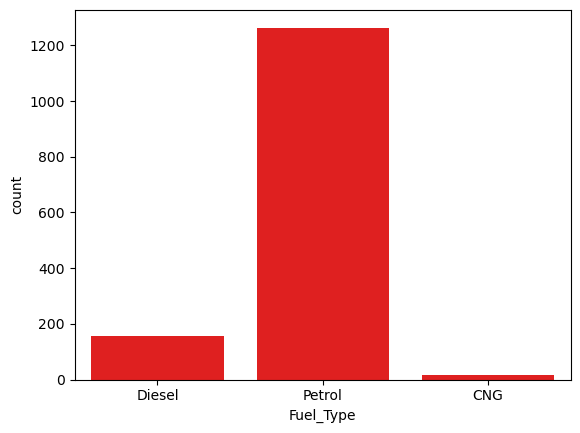

In [43]:
# Visualize the categorical variables
sns.countplot(x='Fuel_Type', data=df,color='red')
plt.show()

In [45]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [47]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [49]:
df.size

15796

In [51]:
df.shape

(1436, 11)

In [53]:
#Preprocessing
# Encode categorical variables
# Import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

In [55]:
# Create a LabelEncoder object
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])

# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler() # Creating an instance of StandardScaler
df[['Age_08_04', 'KM', 'HP', 'cc', 'Automatic','Doors','Cylinders','Gears','Weight']]= scaler.fit_transform(df[['Age_08_04', 'KM', 'HP', 'cc', 'Automatic','Doors','Cylinders','Gears','Weight']])

In [57]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,-1.771966,-0.574695,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
1,13750,-1.771966,0.117454,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
2,13950,-1.718184,-0.715386,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
3,14950,-1.610620,-0.547650,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
4,13750,-1.395491,-0.801028,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,0.702015,-1.279939,2,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883
1432,10845,0.863362,-1.321120,2,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1433,8500,0.809579,-1.374036,2,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1434,7250,0.755797,-1.376703,2,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915


# Step 2: Split the dataset into training and testing sets

In [60]:
#Spliting Features and Target from Dataset

In [62]:
Features = df.drop('Price', axis=1)
Target = df['Price']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(Features,Target, test_size=0.1, random_state=100)

# Step 3: Build multiple linear regression models

In [69]:
#to build three different multiple linear regression models
from sklearn.linear_model import LinearRegression

In [71]:
# Model 1: All variables
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Model 2: Without FuelType and Automatic
model2 = LinearRegression()
model2.fit(X_train.drop(['Fuel_Type', 'Automatic'], axis=1), y_train)

# Model 3: Without Age and KM
model3 = LinearRegression()
model3.fit(X_train.drop(['Age_08_04', 'KM'], axis=1), y_train)

LinearRegression()

In [73]:
# to interpret the coefficients of the models.
print("Model 1 Coefficients:")
print(model1.coef_)
print("\nModel 2 Coefficients:")
print(model2.coef_)
print("\nModel 3 Coefficients:")
print(model3.coef_)

Model 1 Coefficients:
[-2.31559839e+03 -6.47623897e+02  5.50783083e+02  3.80790884e+02
  7.22418831e+01 -1.69699040e+01 -1.94063234e+01  1.13686838e-13
  1.20586427e+02  1.07360787e+03]

Model 2 Coefficients:
[-2.28712005e+03 -7.28697899e+02  4.52500749e+02 -2.77366998e+01
 -3.98078591e+00  2.27373675e-13  1.18096085e+02  9.79034702e+02]

Model 3 Coefficients:
[ 2.66871792e+03  5.49976726e+02 -9.53167108e+01 -1.21402674e+02
 -1.11100024e+02 -5.68434189e-13 -2.79476306e+01  2.60652352e+03]


# Step 4: Evaluate the performance of the models

In [76]:
# to evaluate the performance (MSE) and R-squared
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test.drop(['Fuel_Type', 'Automatic'], axis=1))
y_pred3 = model3.predict(X_test.drop(['Age_08_04', 'KM'], axis=1))

In [80]:
#printing the all MSE and r-square 
print("\nModel 1 MSE:", mean_squared_error(y_test, y_pred1))
print("Model 1 R-squared:", r2_score(y_test, y_pred1))

print("\nModel 2 MSE:", mean_squared_error(y_test, y_pred2))
print("Model 2 R-squared:", r2_score(y_test, y_pred2))

print("\nModel 3 MSE:", mean_squared_error(y_test, y_pred3))
print("Model 3 R-squared:", r2_score(y_test, y_pred3))


Model 1 MSE: 1431668.128358605
Model 1 R-squared: 0.8868732553251308

Model 2 MSE: 1477209.4210872538
Model 2 R-squared: 0.883274699142572

Model 3 MSE: 7025243.896659076
Model 3 R-squared: 0.44488324016320746


# Step 5: Apply Lasso and Ridge methods

In [83]:
#import the new pakage lasso,edge

In [85]:
from sklearn.linear_model import Lasso, Ridge

In [87]:
# Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Ridge model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [89]:
#print the lasso
print("Lasso Coefficients:")
print(lasso_model.coef_)

#print the ridge
print("\nRidge Coefficients:")
print(ridge_model.coef_)

Lasso Coefficients:
[-2315.52184009  -647.77184174   549.18641955   380.93324237
    72.1844814    -16.88383156   -19.21357014     0.
   120.53228054  1073.15114176]

Ridge Coefficients:
[-2315.34958738  -647.80880153   549.84251274   380.89257622
    72.25105901   -16.97123242   -19.33870757     0.
   120.59841427  1073.43227475]


In [93]:
# alpha controls the strength of regularization in Lasso and Ridge methods.
   #You can tune this hyperparameter using cross-validation to achieve better results.

# **Interview Questions**

**1.What is Normalization & Standardization and how is it helpful?**

#2.What techniques can be used to address multicollinearity in multiple linear regression?